In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [2]:
# ROOT_DIR = "/content/drive/MyDrive/1000images(changed)"

In [3]:
# def dataFolder(p, split):

#   if not os.path.exists("./"+p):
#     os.mkdir("./"+p)

#     for dir in os.listdir(ROOT_DIR):
#       os.makedirs("./"+p+"/"+dir)
#       for img in np.random.choice( a = os.listdir(os.path.join(ROOT_DIR, dir)),
#                                   size = (math.floor(split*number_of_images[dir]-5)),
#                                    replace = False):
#         O = os.path.join(ROOT_DIR, dir, img)
#         D = os.path.join("./"+p, dir)
#         shutil.copy(O,D)
#         os.remove(D)
#   else:
#     print( f"{p} Folder exists")

In [4]:
# dataFolder("train", 0.7)

In [5]:
# dataFolder("val", 0.2)

In [6]:
# dataFolder("test", 0.1)

# Model Build

In [7]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras

In [8]:
# CNN Model

# Build the model
model1 = Sequential()

model1.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', input_shape=(224,224,3)))

model1.add(Conv2D(filters = 36, kernel_size=(3, 3), activation='relu', input_shape=(224,224,3)))
model1.add(MaxPool2D(pool_size=(2,2)))

model1.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', input_shape=(224,224,3)))
model1.add(MaxPool2D(pool_size=(2,2)))

model1.add(Conv2D(filters = 128, kernel_size=(3, 3), activation='relu', input_shape=(224,224,3)))
model1.add(MaxPool2D(pool_size=(2,2)))

model1.add(Dropout(0.5))

model1.add(Flatten())
model1.add(Dense(units=64, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(units = 1, activation='sigmoid'))  # Output layer with 1 neuron for binary classification

model1.summary()

C:\Users\kumar\Desktop\Image_Processing_Projectexhibition\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 36)   │         5,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 36)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 64)   │        20,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     5,537,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,638,245 (21.51 MB)

 Trainable params: 5,638,245 (21.51 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model1.compile(optimizer="adam", loss= keras.losses.binary_crossentropy, metrics=['accuracy'])

Preparing our data

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input

In [11]:
def preprocessingImages1(path):

  """
  input : Path
  output: Pre processed images
  """

  image_datagen = ImageDataGenerator(
      rescale=1./255,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)

  image = image_datagen.flow_from_directory(
      directory = path,  # this is the target directory
      target_size=(224, 224),
      batch_size=32,
      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

  return image


In [12]:
path = "train"
train_data = preprocessingImages1(path)

Found 1006 images belonging to 2 classes.


In [13]:
def preprocessingImages2(path):

  """
  input : Path
  output: Pre processed images
  """

  image_datagen = ImageDataGenerator(rescale=1./255)
    
  image = image_datagen.flow_from_directory(
      directory = path,  # this is the target directory
      target_size=(224, 224),
      batch_size=32,
      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

  return image

In [14]:
path = "test"
test_data = preprocessingImages2(path)

Found 58 images belonging to 2 classes.


In [15]:
path = "val"
val_data = preprocessingImages2(path)

Found 360 images belonging to 2 classes.


## Model Training

In [16]:
import numpy as np
from keras.layers import Flatten, Dense
from keras.models import Model, load_model

In [17]:
#Early stopping and model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping

#Early stopping

es = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=6, verbose=1, mode="auto")

#Model check point
mc = ModelCheckpoint(monitor="val_accuracy", filepath="./Selfmodel.keras", verbose=1, save_best_only=True, mode="auto")

cd = [mc]

Model Training

In [18]:
batch_size = 32

In [19]:
hs = model1.fit(x = train_data,
                steps_per_epoch=len(train_data)//batch_size,
                epochs = 20,
                verbose=1,
                validation_data = val_data,
                validation_steps = len(val_data)//batch_size,
                callbacks=cd)

Epoch 1/20


C:\Users\kumar\Desktop\Image_Processing_Projectexhibition\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.6562 - loss: 0.6827
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to ./Selfmodel.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 35s 35s/step - accuracy: 0.6562 - loss: 0.6827 - val_accuracy: 0.5000 - val_loss: 0.7027
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.5714 - loss: 0.5868
Epoch 2: val_accuracy did not improve from 0.50000
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.5714 - loss: 0.5868 - val_accuracy: 0.5000 - val_loss: 0.9629
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4375 - loss: 1.3853
Epoch 3: val_accuracy did not improve from 0.50000
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.4375 - loss: 1.3853 - val_accuracy: 0.5000 - val_loss: 1.2632
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5625 - loss: 1.0151
Epoch 4: val_accuracy did not improve from 0.50000
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.5625 - loss: 1.0151 - val_accuracy: 0.5000 - val_

Graphical Interpretation

In [20]:
h = hs.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Text(0.5, 1.0, 'acc vs val-acc')

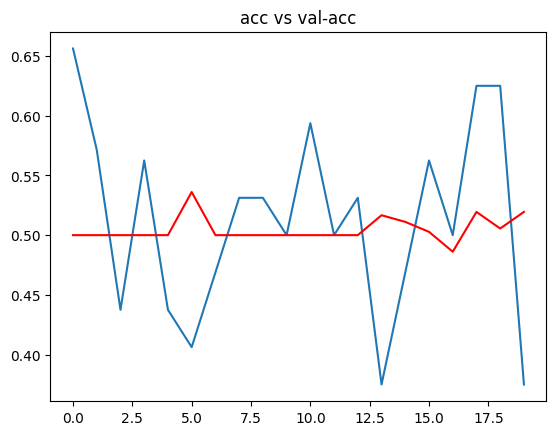

In [21]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c="red")

plt.title("acc vs val-acc")

Text(0.5, 1.0, 'loss vs val-loss')

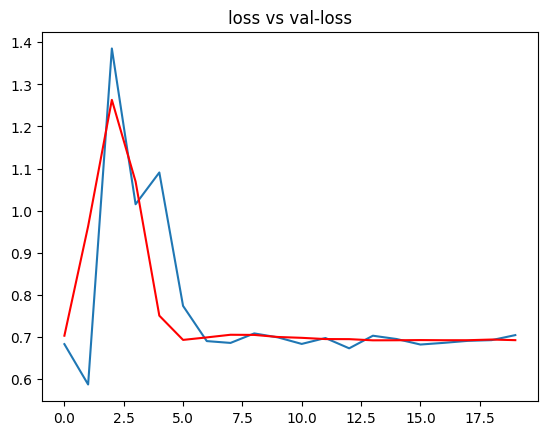

In [22]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c="red")

plt.title("loss vs val-loss")

In [23]:
#Model Accuracy

from keras.models import load_model

model = load_model("./Selfmodel.keras")

**Model Accuracy**

In [24]:
acc = model.evaluate(test_data)[1]

print(f"the accuracy of our model is {acc*100} %")

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.5657 - loss: 0.6921
the accuracy of our model is 55.17241358757019 %


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Predictions:
[[0.41363168]]


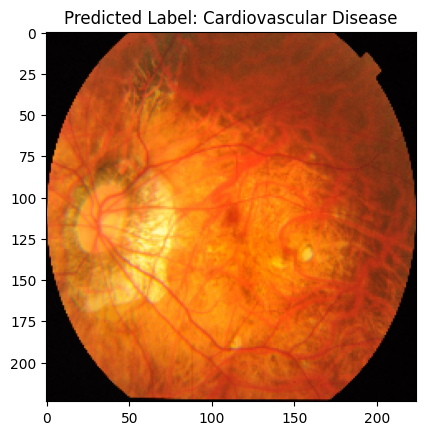

In [49]:
from keras.preprocessing.image import load_img, img_to_array

path = "./test/NotCVD/1ffa94f3-8d87-11e8-9daf-6045cb817f5b..JPG"

img = load_img(path, target_size = (224, 224))
input_arr = img_to_array(img)/255

plt.imshow(img)

input_arr = np.expand_dims(input_arr, axis=0)

predictions = model1.predict(input_arr)
predictions


# Print the predictions
print("Predictions:")
print(predictions)
# Get the predicted label
predicted_label = "Healthy" if predictions > 0.45492 else "Cardiovascular Disease"



plt.title("Predicted Label: " + predicted_label)
plt.show()



In [26]:
train_data.class_indices

{'CVD': 0, 'NotCVD': 1}